# Offical data -> crop -> l2 norm(optional)

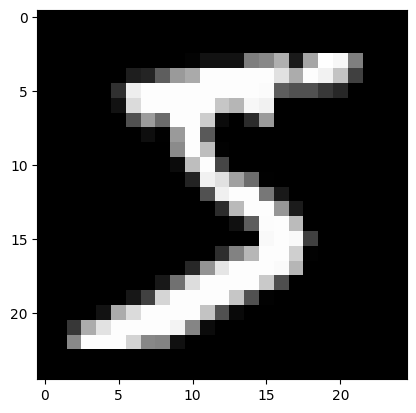

In [36]:
from torchvision import datasets, transforms
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# offical mnist
mnist_offtrain = datasets.MNIST(root='./data', train=True, download=True)
mnist_offtest = datasets.MNIST(root='./data', train=False, download=True)
# to numpy
train_images = mnist_offtrain.data.numpy()
test_images = mnist_offtest.data.numpy()
# crop 25x25 from 28x28
train_images = train_images[:, 2:27, 2:27]
test_images = test_images[:, 2:27, 2:27]
# plot one to check
# print(train_images[0])
plt.imshow(train_images[0], cmap='gray')
plt.show()
# save to npy
np.save('data/train_crop25.npy', train_images)
np.save('data/test_crop25.npy', test_images)

## L2 norm

tensor(1.0000)


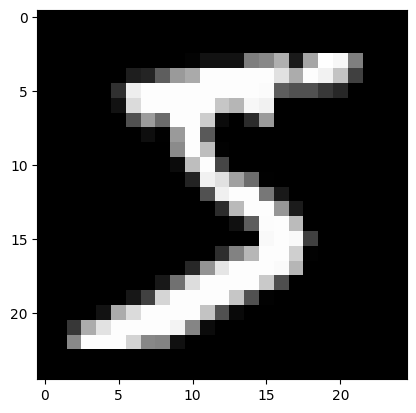

In [46]:
# load np data, convert to tensor
train_images = np.load('data/train_crop25.npy')
test_images = np.load('data/test_crop25.npy')
train_images = torch.from_numpy(train_images).float()
test_images = torch.from_numpy(test_images).float()

# L2 norm
logg = True
train_L2_imgs = []
for i in range(train_images.shape[0]):
    img = train_images[i].reshape(-1)
    # L2 norm
    img = F.normalize(img, p=2, dim=0)
    if logg: 
        print(sum(img**2)) # check if L2 norm is 1
        logg = False
    train_L2_imgs.append(img.reshape(1, 25, 25))

test_L2_imgs = []
for i in range(test_images.shape[0]):
    img = test_images[i].reshape(-1)
    # L2 norm
    img = F.normalize(img, p=2, dim=0)
    # print(sum(img**2)) # check if L2 norm is 1
    test_L2_imgs.append(img.reshape(1, 25, 25))

train_L2_imgs = torch.cat(train_L2_imgs, dim=0)
test_L2_imgs = torch.cat(test_L2_imgs, dim=0)

# convert torch to numpy
train_L2_imgs = train_L2_imgs.numpy()
test_L2_imgs = test_L2_imgs.numpy()

np.save('data/train_crop25_L2.npy', train_L2_imgs)
np.save('data/test_crop25_L2.npy', test_L2_imgs)

# plot a img form train_L2_imgs
img = train_L2_imgs[0]
img = np.reshape(img, (25, 25))
plt.imshow(img, cmap='gray')
plt.show()


# L2, unfold 7*7

torch.Size([60000, 1, 25, 25]) torch.Size([10000, 1, 25, 25])


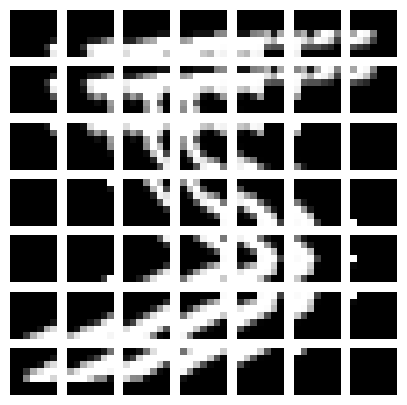

In [47]:
train_L2_imgs = np.load('data/train_crop25_L2.npy')
test_L2_imgs = np.load('data/test_crop25_L2.npy')

train_L2_tsr = torch.from_numpy(train_L2_imgs).unsqueeze(1)
test_L2_tsr = torch.from_numpy(test_L2_imgs).unsqueeze(1)
print(train_L2_tsr.shape, test_L2_tsr.shape) # 60000, 1, 25, 25

# unfold each image, windows size = 7, stride = 3
saved_train = []
for i in range(train_L2_tsr.shape[0]):
    patches = F.unfold(train_L2_tsr[i], kernel_size=7, stride=3)
    patches = patches.permute(1, 0).unsqueeze(0)
    # print(patches.shape) # 1, 49, 49
    saved_train.append(patches)
    
    # plot the patch in subplots 7*7
    if i == 0:
        fig, axs = plt.subplots(7, 7, figsize=(5, 5))
        for j in range(7):
            for k in range(7):
                img = patches[0, j*7+k, :].view(7, 7)
                axs[j, k].imshow(img, cmap='gray')
                axs[j, k].axis('off')

saved_train = torch.cat(saved_train, dim=0)
plt.show()

saved_test = []
for i in range(test_L2_tsr.shape[0]):
    patches = F.unfold(test_L2_tsr[i], kernel_size=7, stride=3)
    patches = patches.permute(1, 0).unsqueeze(0)
    # print(patches.shape) # 1, 49, 49
    saved_test.append(patches)

saved_test = torch.cat(saved_test, dim=0)

# convert to numpy
saved_train = saved_train.numpy()
saved_test = saved_test.numpy()

np.save('data/train_crop25_L2_patches.npy', saved_train)
np.save('data/test_crop25_L2_patches.npy', saved_test)

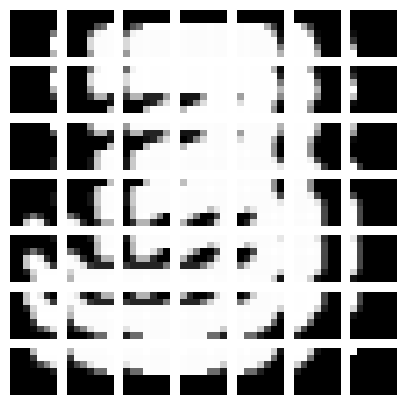

In [51]:
# load pt and plot to check
saved_train = np.load('data/train_crop25_L2_patches.npy')
saved_test = np.load('data/test_crop25_L2_patches.npy')

# plot the patch in subplots 7*7
fig, axs = plt.subplots(7, 7, figsize=(5, 5))
for j in range(7):
    for k in range(7):
        img = saved_test[200, j*7+k, :].reshape(7, 7)
        axs[j, k].imshow(img, cmap='gray')
        axs[j, k].axis('off')
plt.show()